In [1]:
import pandas as pd
import numpy as np
import difflib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

###  Collection and Pre-Processing

In [2]:
data=pd.read_csv('movies (2) (1).csv')

In [3]:
data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [4]:
data.keys()

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [5]:
data.shape

(4803, 24)

In [6]:
data.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

### data Visulization

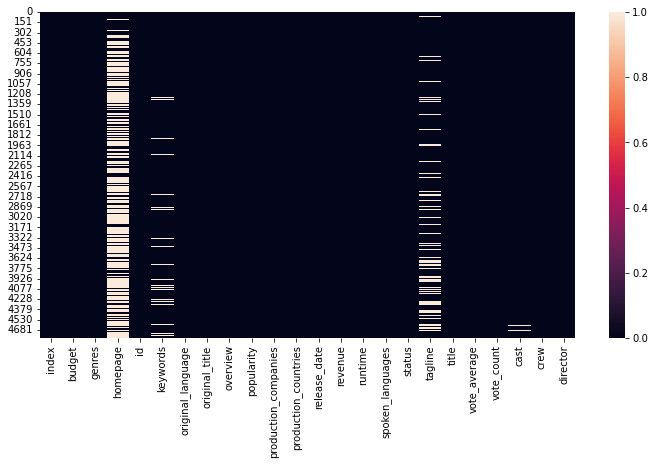

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull())
plt.show()

In [8]:
data['genres'].value_counts()

Drama                                     370
Comedy                                    282
Drama Romance                             164
Comedy Romance                            144
Comedy Drama                              142
                                         ... 
Adventure Comedy Crime Science Fiction      1
Action Comedy Family Adventure              1
Drama Adventure Western                     1
Adventure Fantasy Action Romance            1
Comedy Drama Romance TV Movie               1
Name: genres, Length: 1168, dtype: int64

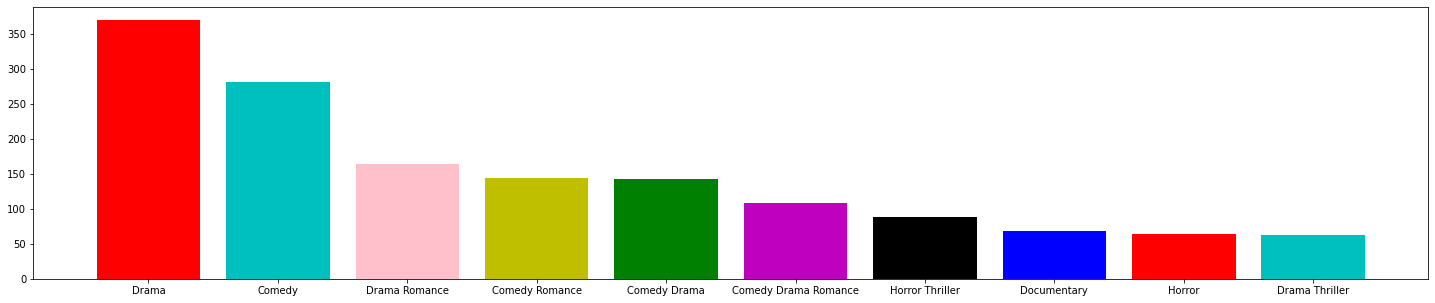

In [9]:
plt.figure(figsize=(25,5))
plt.bar(list(data['genres'].value_counts()[0:10].keys()),list(data['genres'].value_counts()[0:10]), color = ['r','c','pink','y','g','m','k','b'] )
plt.show()

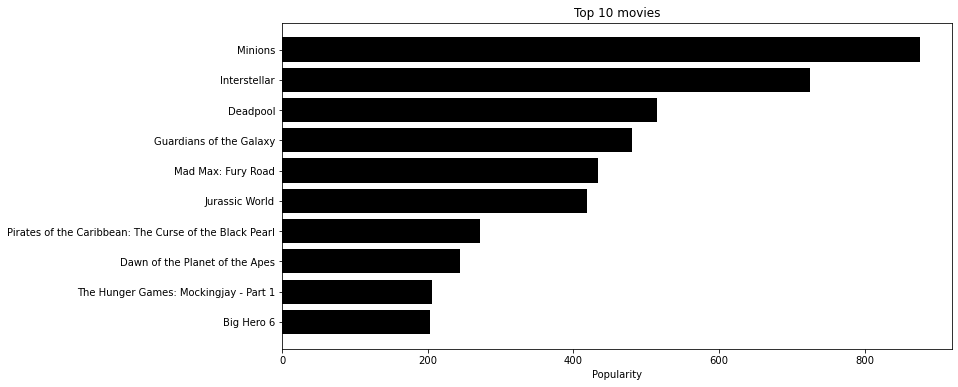

In [10]:
def plot():
    popularity = data.sort_values("popularity", ascending=False)
    plt.figure(figsize=(12, 6))
    plt.barh(popularity["title"].head(10), popularity["popularity"].head(10), align="center", color='black')
    plt.gca().invert_yaxis()
    plt.title("Top 10 movies")
    plt.xlabel("Popularity")
    plt.show()
    
plot()

In [11]:
data['vote_average'].value_counts()

6.5    216
6.0    216
6.7    213
6.3    207
6.1    201
      ... 
2.7      1
0.5      1
2.2      1
1.9      1
2.4      1
Name: vote_average, Length: 71, dtype: int64

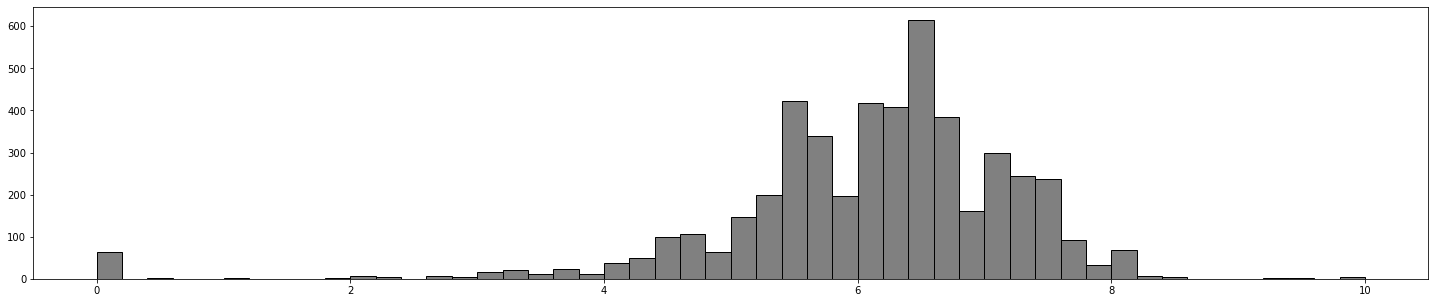

In [12]:
plt.figure(figsize=(25,5))
plt.hist(data['vote_average'],color='grey',edgecolor='Black',bins=50)
plt.show()

In [13]:
selected_features = ['genres','keywords','tagline','cast','director']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [14]:
for feature in selected_features:
  data[feature] = data[feature].fillna('')

In [15]:
combined_features = data['genres']+' '+data['keywords']+' '+data['tagline']+' '+data['cast']+' '+data['director']

In [16]:
combined_features.shape

(4803,)

### Feature extraction

In [17]:
feature_extraction = TfidfVectorizer()

In [18]:
feature_vectors=feature_extraction.fit_transform((combined_features).apply(lambda x: np.str_(x)))

In [19]:
print(feature_vectors)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

### Cosine Similarity

In [20]:
similarity = cosine_similarity(feature_vectors)

In [21]:
print(similarity.shape)

(4803, 4803)


In [ ]:
## creating a user defind function for movie recomandation.
movie_name = input(' Enter your favourite movie name : ')

# creating a list with all the movie names given in the data.
list_of_titles = data['title'].tolist()

# finding the close match for the movie name given by the user with the help of difflib function.
finds_close_match = difflib.get_close_matches(movie_name, list_of_titles)
close_match = finds_close_match[0]

# find the index of the movie with title of movie.
index_of_movie = data[data.title == close_match]['index'].values[0]
similarity_score = list(enumerate(similarity[index_of_movie]))

# sorting the movies based on their similarity score.
sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
print('Movies suggested for you : \n')

i = 1
for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = data[data.index==index]['title'].values[0]
  if (i<10):
    print(i, '.',title_from_index)
    i+=1